<a href="https://colab.research.google.com/github/Deviprasad21/MACHINE-LEARNING-USING-PYTHON/blob/main/NN_Forward_and_Backward_Propagations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.24978340413566286
Epoch 1000, Loss: 0.24896459048120248
Epoch 2000, Loss: 0.2416253942028901
Epoch 3000, Loss: 0.17708919421308514
Epoch 4000, Loss: 0.04069083957551631
Epoch 5000, Loss: 0.014026561838144722
Epoch 6000, Loss: 0.007761889738385109
Epoch 7000, Loss: 0.005221459850205507
Epoch 8000, Loss: 0.0038864505945816552
Epoch 9000, Loss: 0.0030748688206721293

Predictions after training:
[[0.05084588]
 [0.94180705]
 [0.95348016]
 [0.04470367]]


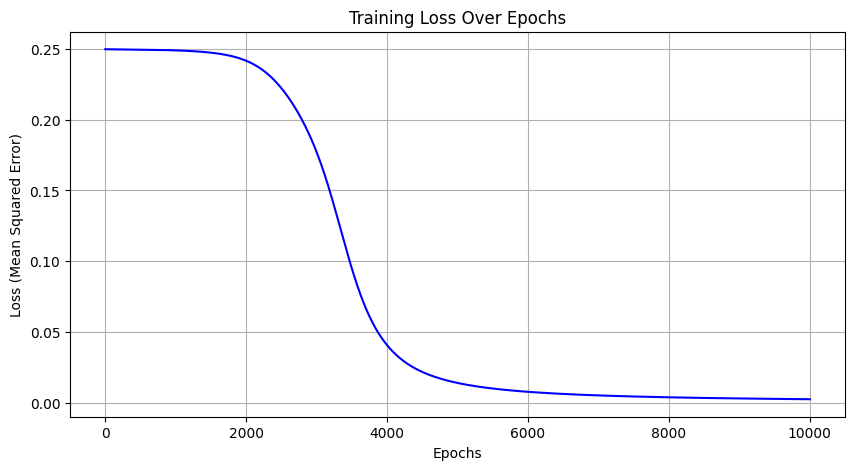

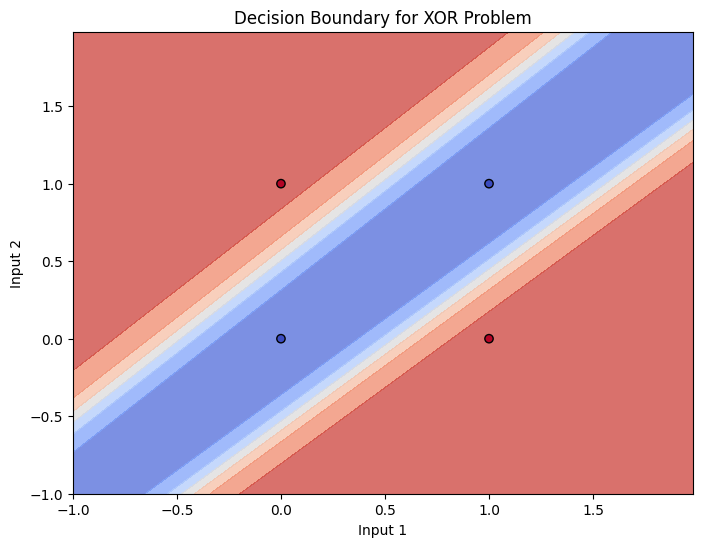

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Sigmoid Activation Function and its Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss Function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)  # Weight matrix for input to hidden layer
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)  # Weight matrix for hidden to output layer
        self.bias_hidden = np.zeros((1, hidden_size))  # Bias for hidden layer
        self.bias_output = np.zeros((1, output_size))  # Bias for output layer
        self.losses = []  # To store loss values for plotting

    # Forward Propagation
    def forward(self, X):
        self.input = X
        self.hidden_input = np.dot(self.input, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)  # Apply activation function
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)  # Apply activation function to get final output
        return self.output

    # Backward Propagation
    def backward(self, y_true, learning_rate=0.1):
        # Calculate the error in output layer
        output_error = self.output - y_true  # Derivative of loss function with respect to output

        # Calculate gradient for output weights
        output_delta = output_error * sigmoid_derivative(self.output)

        # Calculate error in hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)

        # Calculate gradient for hidden weights
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases (Gradient Descent)
        self.weights_hidden_output -= self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden -= self.input.T.dot(hidden_delta) * learning_rate
        self.bias_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Training Function
    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for epoch in range(epochs):
            # Forward propagation
            self.forward(X)
            # Backward propagation (adjust weights)
            self.backward(y, learning_rate)

            # Calculate and store loss for plotting
            loss = mean_squared_error(y, self.output)
            self.losses.append(loss)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    # Prediction Function
    def predict(self, X):
        return self.forward(X)

# XOR Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])  # XOR outputs

# Create Neural Network with 2 inputs, 2 hidden neurons, and 1 output
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the network
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print("\nPredictions after training:")
print(predictions)

# Plotting the Loss Function over Epochs
plt.figure(figsize=(10, 5))
plt.plot(nn.losses, color='blue')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (Mean Squared Error)")
plt.grid(True)
plt.show()

# Plotting the Decision Boundary for XOR problem
h = .02  # Step size for mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
plt.title("Decision Boundary for XOR Problem")
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()
